<a href="https://colab.research.google.com/github/Adarsh1826/ml/blob/main/algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import fetch_california_housing

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

df= fetch_california_housing()

In [12]:
df=fetch_california_housing()

In [13]:
dataset =pd.DataFrame(df.data)
dataset.columns = df.feature_names
dataset['Price'] = df.target
print(dataset.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [14]:
## dviding into indepent and dependent
## x for independent
## y for dependent
print(dataset.head() )

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


NameError: name 'y' is not defined

In [18]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [19]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [21]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
## dividing train and test data
mse= cross_val_score(lin_reg,x,y,scoring="neg_mean_squared_error",cv=5)
print(mse)
mean_mse=np.mean(mse)
print(mean_mse)

[-0.48485857 -0.62249739 -0.64621047 -0.5431996  -0.49468484]
-0.5582901717686546


In [22]:
lin_reg.fit(x,y)
lin_reg.predict(x)

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

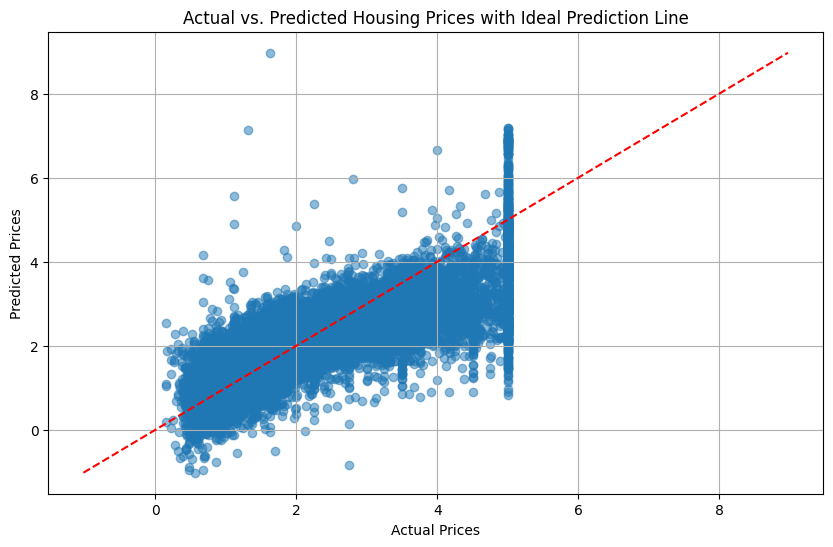

In [23]:
# Get the predicted values
predictions = lin_reg.predict(x)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)

# Add the perfect prediction line (where predicted = actual)
min_val = min(y.min(), predictions.min())
max_val = max(y.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Housing Prices with Ideal Prediction Line")
plt.grid(True)
plt.show()

In [24]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
ridge_regressor = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 10}
-0.5581857057691497


In [26]:
## Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso=Lasso()
params ={'alpha':[1e-15,1e-10,1e-8,1e-6,1e-3,1,2,3,4]}
lasso_regressor =GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.076e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.419e+03, tolerance: 2.110e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-06, 0.001, 1, 2, 3,
                                   4]},
             scoring='neg_mean_squared_error')

In [27]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.558275929386899


In [28]:
## train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [33]:
## train linear  reg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
mse = cross_val_score(lin_reg,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)
lin_reg.fit(x_train,y_train)

-0.5281762474209332


LinearRegression()

In [34]:
y_pred =lin_reg.predict(x_test)
print(y_pred)

[2.28110738 2.79009128 1.90332794 ... 0.8418697  2.7984953  2.21779325]


In [37]:
## r2
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
print(r2_score*100)

59.43232652466202
